In [ ]:
import yfinance as yf
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from keras import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import LSTM, Dense, Input, Flatten
from sklearn.model_selection import train_test_split
import tweepy

In [ ]:
tickers = ["ETH-USD"]
data_of_currencies = yf.download(tickers, period="max")
data_of_currencies.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-27,3368.886230,3470.923096,3362.264648,3444.800537,3444.800537,11771834016
2024-06-28,3445.498779,3482.957520,3363.437500,3373.635986,3373.635986,12861158844
2024-06-29,3373.689941,3401.730225,3369.552734,3372.967773,3372.967773,6584792001
2024-06-30,3373.075684,3453.211426,3352.284424,3432.889160,3432.889160,8396416013
2024-07-01,3432.607422,3512.434814,3429.810791,3485.025391,3485.025391,10312306688


In [ ]:
df=data_of_currencies["Close"]

In [ ]:
df_eth_ = pd.DataFrame(df)
df_eth_.shape,len(df_eth_)

((2427, 1), 2427)

In [ ]:
df_eth_.tail()

,Close
Date,
2024-06-27,3444.800537
2024-06-28,3373.635986
2024-06-29,3372.967773
2024-06-30,3432.889160
2024-07-01,3485.025391


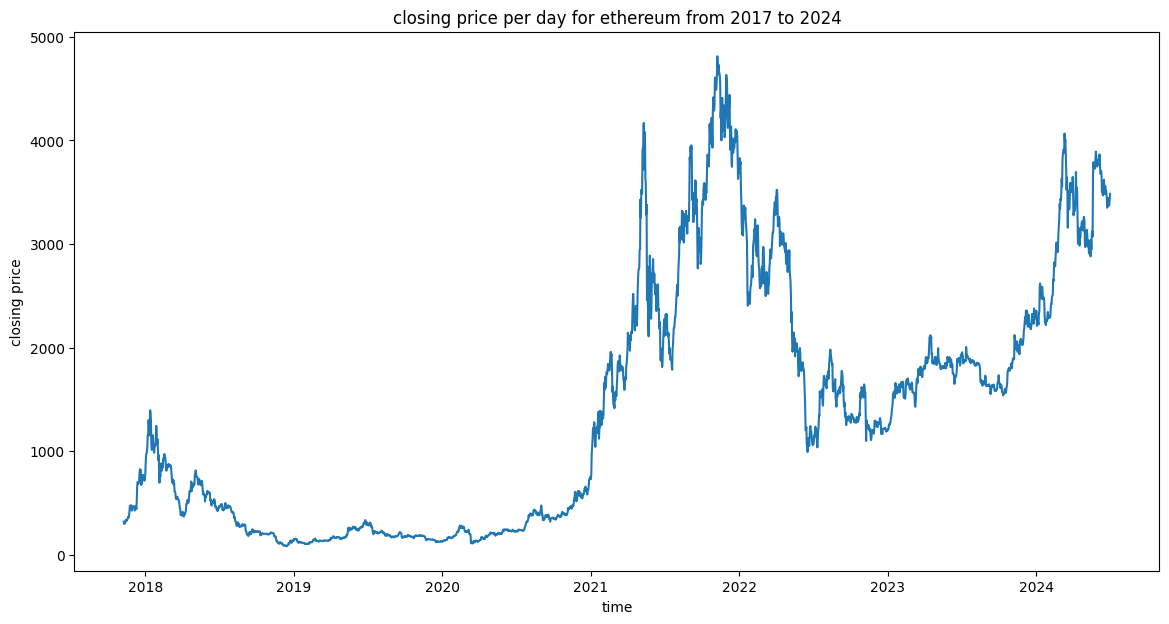

In [ ]:
#for ETH-USD
plt.figure(figsize=(14,7))
sns.lineplot(data=df_eth_,x=df_eth_.index,y="Close")
plt.title("closing price per day for ethereum from 2017 to 2024")
plt.xlabel("time")
plt.ylabel("closing price")
plt.show()

In [ ]:
def make_windows(data,window_size,stride):
  x = []
  y = []
  for i in range(window_size,len(data),stride):
    current_window = data.iloc[i-window_size:i,:].values
    x.append(current_window)
    y.append(data.iloc[i, :].values)
  return np.array(x),np.array(y)
X,Y = make_windows(df_eth_,window_size=15,stride=1)
print(X.shape)
print(Y.shape)

(2412, 15, 1)
(2412, 1)


In [ ]:
def Scale_data(X_train, X_test, y_train, y_test):
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Fit only on the training data
    X_train_reshaped = X_train.reshape(X_train.shape[0] * X_train.shape[1], X_train.shape[2])
    X_train_scaled = scaler_X.fit_transform(X_train_reshaped).reshape(X_train.shape)
    y_train_scaled = scaler_y.fit_transform(y_train)

    # Transform the test data using the same scaler
    X_test_reshaped = X_test.reshape(X_test.shape[0] * X_test.shape[1], X_test.shape[2])
    X_test_scaled = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)
    y_test_scaled = scaler_y.transform(y_test)

    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, scaler_X, scaler_y


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1929, 15, 1)
(483, 15, 1)
(1929, 1)
(483, 1)


In [ ]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,scaler_X,scaler_Y = Scale_data(X_train,X_test,y_train,y_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(1929, 15, 1)
(483, 15, 1)
(1929, 1)
(483, 1)


In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(64,activation="relu",return_sequences=True))
model.add(LSTM(32,activation="relu",return_sequences=True))
model.add(LSTM(16,activation="relu"))
model.add(Dense(84,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(units=y_train.shape[1]))
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [ ]:
model.fit(X_train_scaled,y_train_scaled,epochs = 50,batch_size =32)

Epoch 1/50
61/61 [==============================] - 6s 23ms/step - loss: 0.3885 - mae: 0.4361
Epoch 2/50
61/61 [==============================] - 1s 25ms/step - loss: 0.0380 - mae: 0.1167
Epoch 3/50
61/61 [==============================] - 1s 24ms/step - loss: 0.0299 - mae: 0.1004
Epoch 4/50
61/61 [==============================] - 3s 41ms/step - loss: 0.0236 - mae: 0.0970
Epoch 5/50
61/61 [==============================] - 2s 36ms/step - loss: 0.0209 - mae: 0.0909
Epoch 6/50
61/61 [==============================] - 1s 24ms/step - loss: 0.0168 - mae: 0.0805
Epoch 7/50
61/61 [==============================] - 1s 24ms/step - loss: 0.0161 - mae: 0.0787
Epoch 8/50
61/61 [==============================] - 1s 24ms/step - loss: 0.0160 - mae: 0.0803
Epoch 9/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0151 - mae: 0.0803
Epoch 10/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0140 - mae: 0.0743
Epoch 11/50
61/61 [==============================] - 2s 25m

In [ ]:
model.evaluate(X_test_scaled,y_test_scaled,batch_size=32)

16/16 [==============================] - 1s 7ms/step - loss: 0.0086 - mae: 0.0718


[0.008603359572589397, 0.07184004038572311]

In [ ]:
print(df_eth_["Close"].iloc[-15:])
values_for_prediction = np.array(df_eth_["Close"].iloc[-15:])
print(values_for_prediction)
values_for_prediction=scaler_X.transform(values_for_prediction.reshape(-1,1))
prediction=model.predict(values_for_prediction.reshape(1,15,1))
prediction = scaler_Y.inverse_transform(prediction)
print(f"Predictions for tommorow closing price: ",np.squeeze(prediction))

Date
2024-06-17    3511.378906
2024-06-18    3483.681396
2024-06-19    3559.347412
2024-06-20    3511.086914
2024-06-21    3516.075684
2024-06-22    3494.813477
2024-06-23    3418.611816
2024-06-24    3350.256348
2024-06-25    3395.029053
2024-06-26    3369.477295
2024-06-27    3444.800537
2024-06-28    3373.635986
2024-06-29    3372.967773
2024-06-30    3432.889160
2024-07-01    3485.025391
Name: Close, dtype: float64
[3511.37890625 3483.68139648 3559.34741211 3511.08691406 3516.07568359
 3494.81347656 3418.61181641 3350.25634766 3395.02905273 3369.47729492
 3444.80053711 3373.63598633 3372.96777344 3432.88916016 3485.02539062]
1/1 [==============================] - 0s 59ms/step
Predictions for tommorow closing price:  3372.776


In [ ]:
# Predict on the test data
y_pred_scaled = model.predict(X_test_scaled, batch_size=32)

# Inverse transform the predictions and actual values
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_test = scaler_Y.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (original scale): {mse}")
print(f"Mean Absolute Error (original scale): {mae}")


16/16 [==============================] - 0s 6ms/step
Mean Squared Error (original scale): 9180.427580886317
Mean Absolute Error (original scale): 71.8803870821693


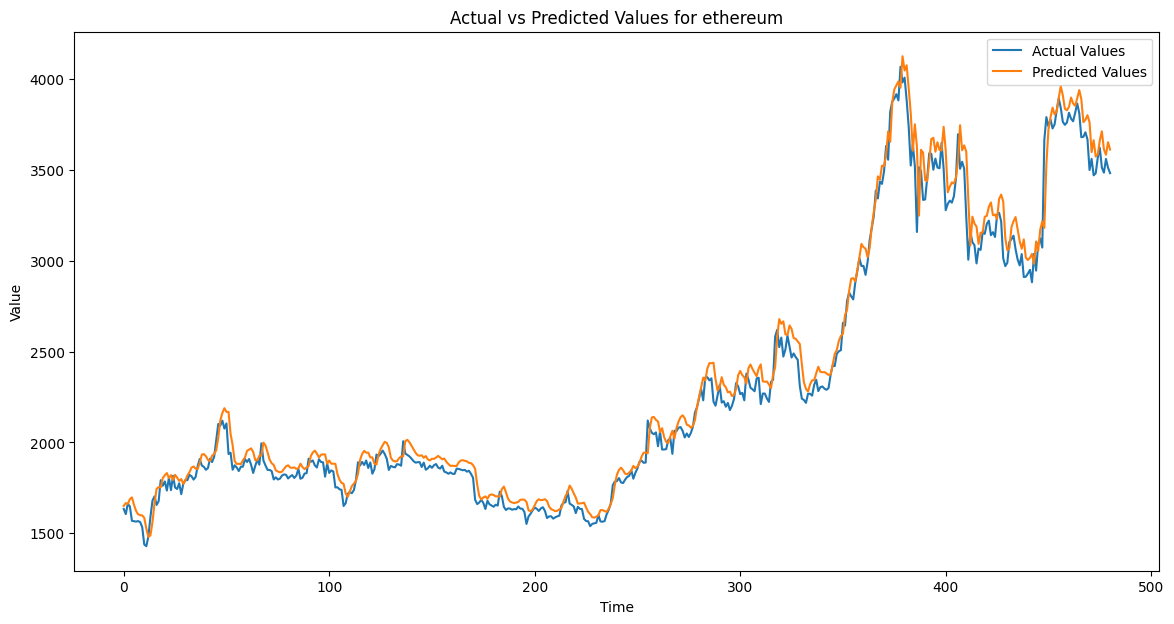

In [ ]:
# Plot the predictions and actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test[:, 0], label='Actual Values')
plt.plot(y_pred[:, 0], label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for ethereum')
plt.legend()
plt.show()

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# Set up the WebDriver
driver_path = 'path/to/chromedriver'  # Update this path
driver = webdriver.Chrome(executable_path=driver_path)

# Open Twitter search page
query = "Ethereum"
url = f"https://twitter.com/search?q={query}&src=typed_query&f=live"
driver.get(url)

# Scroll to load tweets
time.sleep(3)  # Wait for the page to load
for _ in range(5):  # Adjust the range to scroll more
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)  # Wait for new tweets to load

# Parse tweets
tweets = []
tweet_elements = driver.find_elements(By.XPATH, '//div[@data-testid="tweet"]/div[2]/div[2]/div[1]')
for tweet in tweet_elements:
    tweets.append(tweet.text)

# Close the WebDriver
driver.quit()

# Print the tweets
for tweet in tweets:
    print(tweet)


TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

[]